# LSTM SUR LES STOCKS

In [1]:
import pandas as pdµ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from notify_run import Notify # pour m'envoyer des notification

### Importation des données

In [2]:
amzn = pd.read_csv('C:/Users/utilisateur/Downloads/IA simplon/Projets/Stratetgy_Trading/CSV/amazon_prices.csv')
goog = pd.read_csv('C:/Users/utilisateur/Downloads/IA simplon/Projets/Stratetgy_Trading/CSV/google_prices.csv')
msft = pd.read_csv('C:/Users/utilisateur/Downloads/IA simplon/Projets/Stratetgy_Trading/CSV/microsoft_prices.csv')


In [62]:
amzn.head()

,Open,High,Low,Close,Volume,companies,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return
Date,,,,,,,,,,,,
2010-09-30,160.01,160.93,155.60,157.06,7606000,AMZN,158.265,AMAZON,NaN,NaN,NaN,NaN
2010-10-01,157.08,157.44,152.20,153.71,8683400,AMZN,154.820,AMAZON,NaN,NaN,NaN,-0.021329
2010-10-04,153.95,155.96,152.79,155.39,5346500,AMZN,154.375,AMAZON,NaN,NaN,NaN,0.010930
2010-10-05,157.08,161.21,157.01,160.87,5620000,AMZN,159.110,AMAZON,NaN,NaN,NaN,0.035266
2010-10-06,160.60,160.68,154.60,155.40,6060800,AMZN,157.640,AMAZON,NaN,NaN,NaN,-0.034003


## Datavisualisation et EDA

In [6]:
goog.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,729.444503,736.054551,722.727663,729.652444,2.954124e+06
std,363.814841,367.944483,360.123027,364.281356,2.462035e+06
min,236.110000,239.480000,235.630000,236.550000,7.900000e+03
25%,402.175000,406.047500,400.375000,403.242500,1.393450e+06
50%,653.680000,659.620000,643.580000,650.720000,2.032500e+06
75%,1055.170000,1067.155000,1044.260000,1055.042500,3.970550e+06
max,1709.710000,1733.180000,1666.330000,1728.280000,2.976060e+07


In [7]:
amzn.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,852.587258,861.557742,842.521216,852.536777,4.327412e+06
std,742.895592,751.603640,732.881788,742.668467,2.411534e+06
min,152.510000,155.960000,151.400000,153.030000,8.813000e+05
25%,266.585000,269.327500,263.667500,266.402500,2.769375e+06
50%,532.515000,539.170000,526.030000,533.040000,3.711250e+06
75%,1488.180000,1521.280000,1475.910000,1495.932500,5.114100e+06
max,3547.000000,3552.250000,3486.690000,3531.450000,2.413420e+07


In [8]:
msft.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,64.173994,64.780286,63.536006,64.196793,3.814394e+07
std,48.423158,48.985512,47.806050,48.433191,2.130739e+07
min,18.980000,19.010000,18.840000,18.940000,7.425600e+06
25%,26.460000,26.670000,26.290000,26.457500,2.403992e+07
50%,43.235000,43.615000,42.895000,43.270000,3.286325e+07
75%,90.570000,91.665000,89.652500,90.542500,4.722730e+07
max,229.270000,232.860000,227.350000,231.650000,3.193179e+08


In [9]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Volume     2516 non-null   int64  
 6   companies  2516 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 137.7+ KB


In [10]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Volume     2516 non-null   int64  
 6   companies  2516 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 137.7+ KB


In [11]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Volume     2516 non-null   int64  
 6   companies  2516 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 137.7+ KB


In [12]:
pd.to_datetime(goog['Date'])
pd.to_datetime(amzn['Date'])
pd.to_datetime(msft['Date'])

0      2010-09-30
1      2010-10-01
2      2010-10-04
3      2010-10-05
4      2010-10-06
          ...    
2511   2020-09-22
2512   2020-09-23
2513   2020-09-24
2514   2020-09-25
2515   2020-09-28
Name: Date, Length: 2516, dtype: datetime64[ns]

In [13]:
# on va créer une colonne représente la moyenne de la valeur haute et basse
msft['Mean_Price'] = (msft['Low']+msft['High'])/2.0
goog['Mean_Price'] = (goog ['Low']+goog['High'])/2.0
amzn['Mean_Price'] = (amzn['Low']+amzn['High'])/2.0

In [14]:
# On va sauver ces dataframes en un nouveau dataframe
msft.to_csv('microsoft2.csv')
goog.to_csv('google2.csv')
amzn.to_csv('amazon2.csv')

In [15]:
# on met la date en index
amzn.index = amzn.Date
goog.index = goog.Date
msft.index = msft.Date

In [16]:
# On supprime la colonne date
amzn = amzn.drop("Date", axis = 1)
goog = goog.drop("Date", axis = 1)
msft = msft.drop("Date", axis = 1)

In [17]:
msft.head()

,Open,High,Low,Close,Volume,companies,Mean_Price
Date,,,,,,,
2010-09-30,19.50,19.67,19.30,19.40,61262700,MSFT,19.485
2010-10-01,19.62,19.66,19.25,19.32,62672300,MSFT,19.455
2010-10-04,18.98,19.01,18.84,18.94,98143400,MSFT,18.925
2010-10-05,19.06,19.37,18.94,19.29,78152900,MSFT,19.155
2010-10-06,19.27,19.44,19.12,19.36,50489700,MSFT,19.280


In [61]:
# On va concaténer les dataframes
tech_list = ['GOOG', 'MSFT', 'AMZN']
company_list = [goog, msft, amzn]
company_name = ["GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

,Open,High,Low,Close,Volume,companies,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return,Date
2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,AMZN,3067.095,AMAZON,3095.024,3241.7185,3176.3698,0.056923,NaN
2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,AMZN,3059.690,AMAZON,3068.149,3224.3870,3174.6870,-0.041269,NaN
2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,AMZN,3017.150,AMAZON,3052.617,3203.2840,3174.9054,0.006644,NaN
2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,AMZN,3050.270,AMAZON,3050.508,3188.0405,3176.8100,0.024949,NaN
2020-09-28,3148.85,3175.04,3117.17,3174.05,4224200,AMZN,3146.105,AMAZON,3057.616,3176.6530,3181.0516,0.025498,NaN


### Quelle a été la variation du prix?

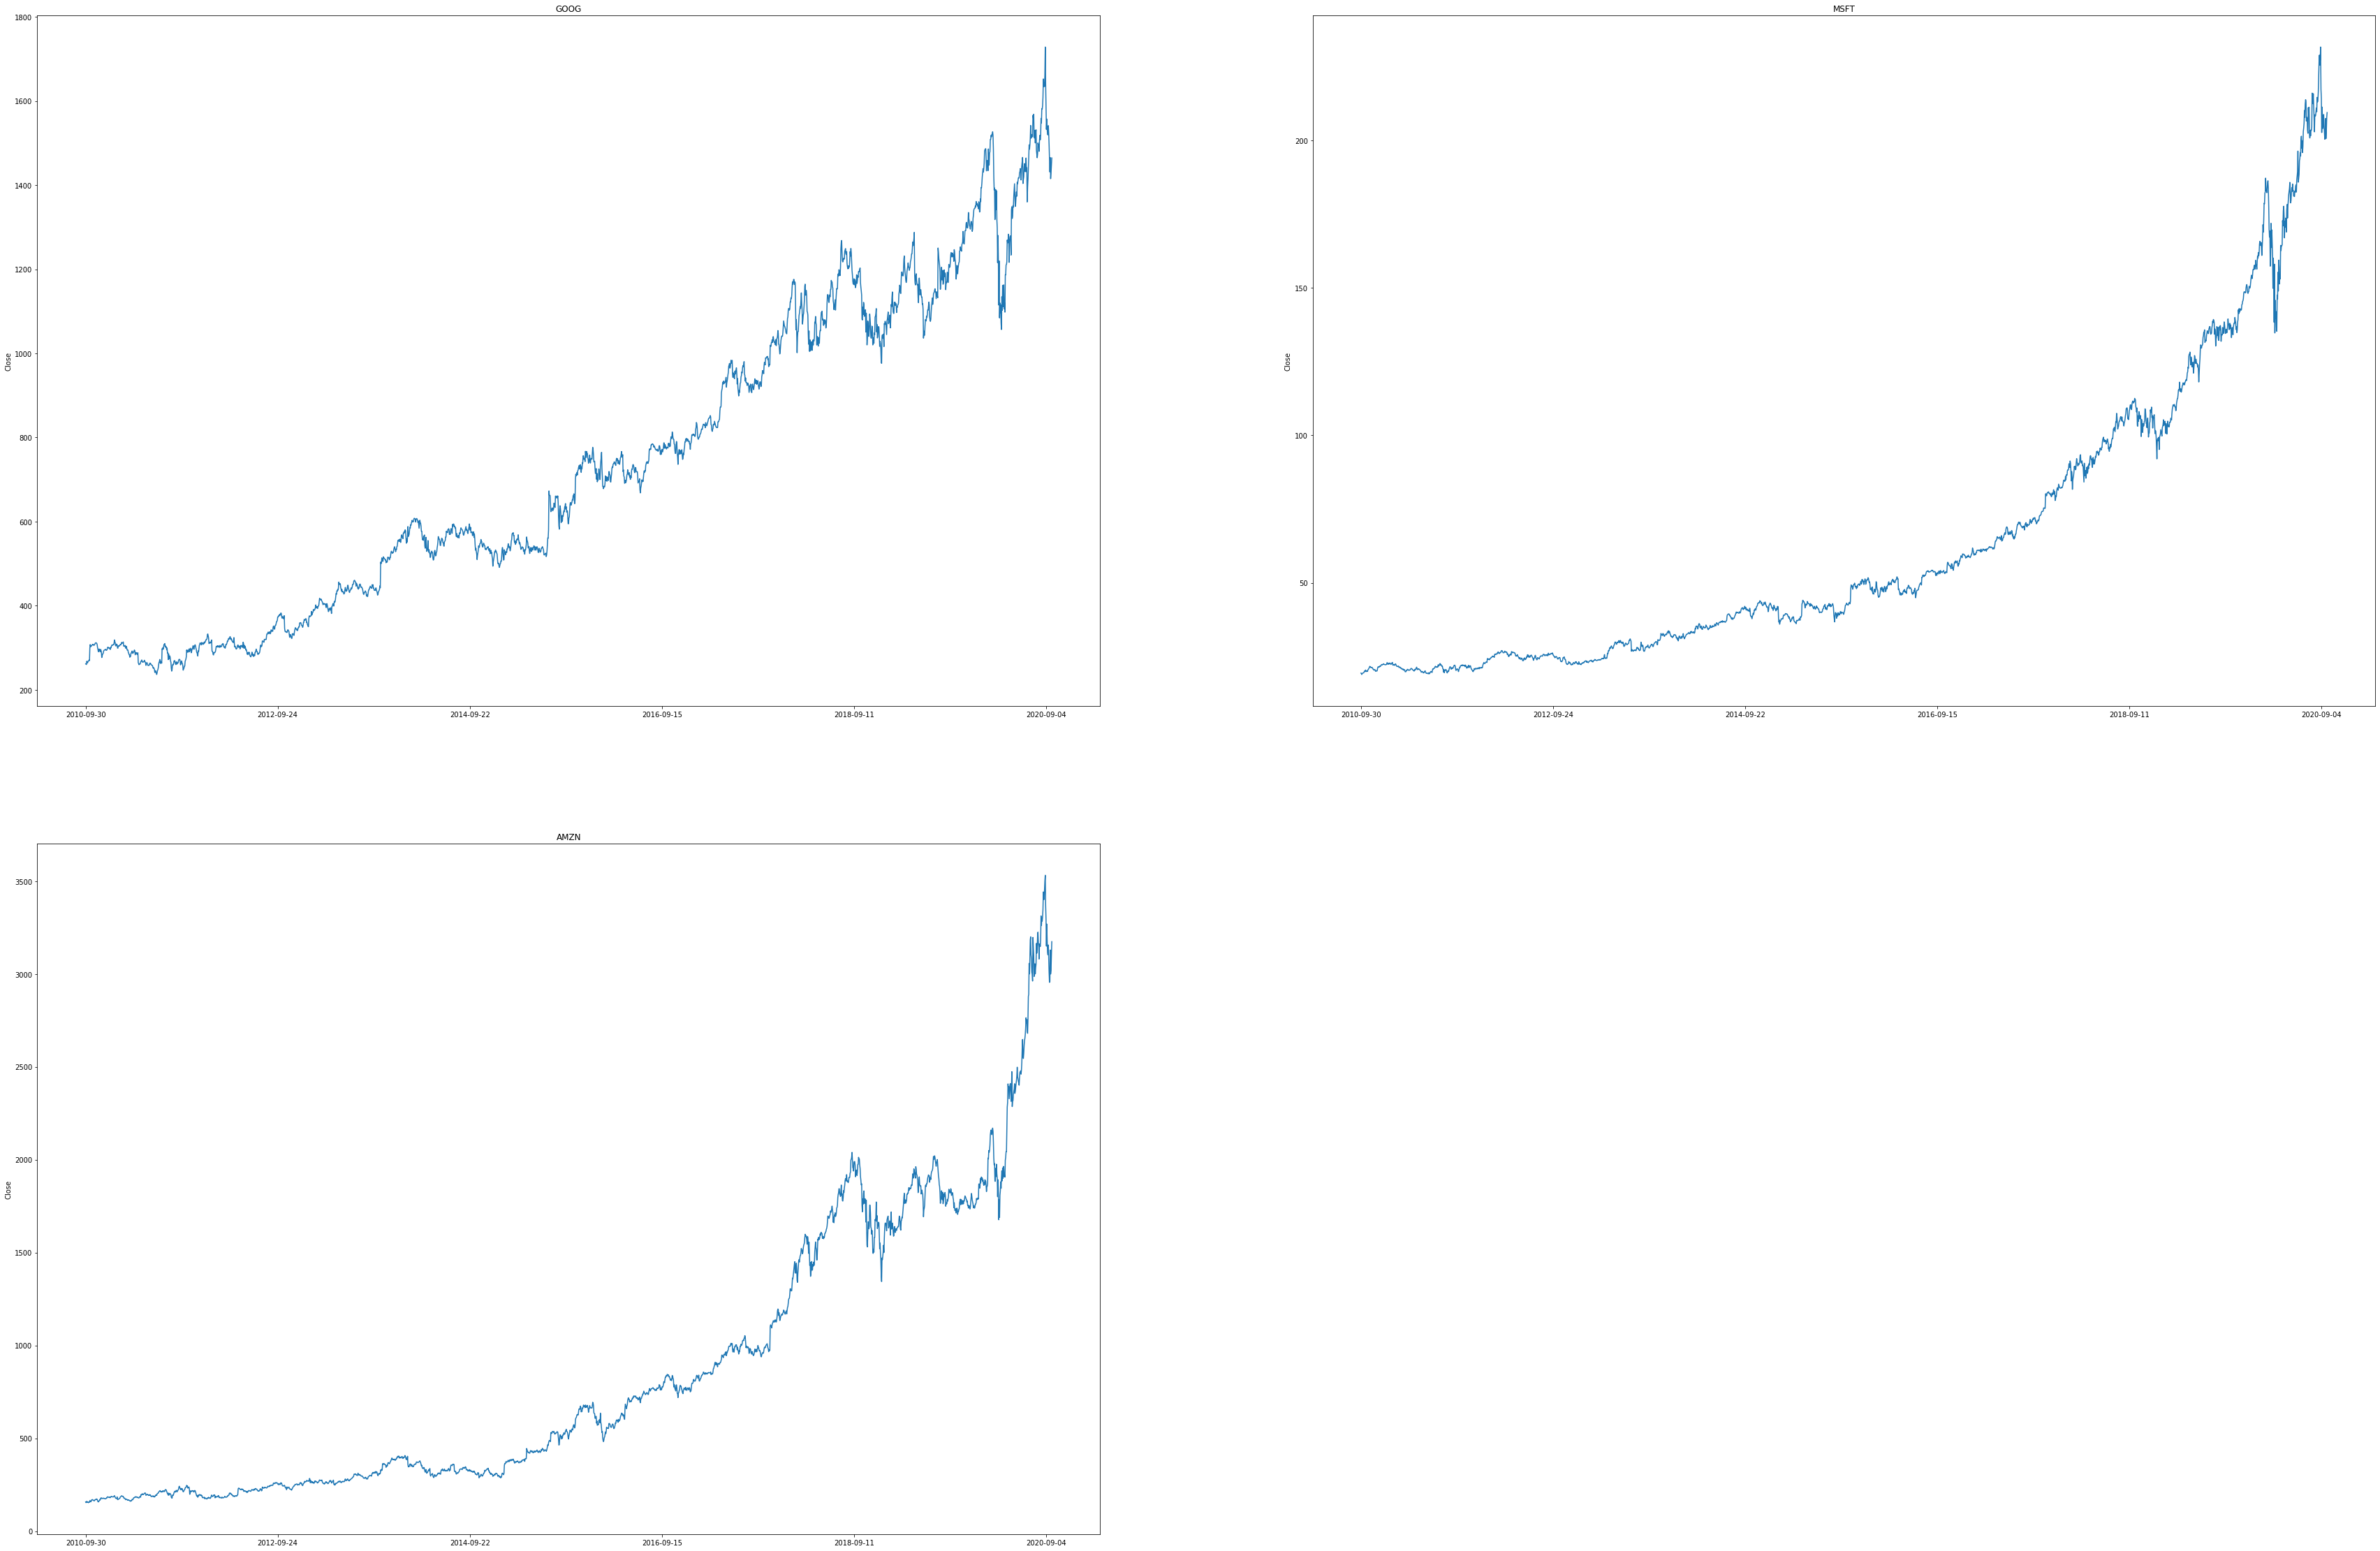

In [19]:
# On va  voir l'évolution du prix de fermeture
plt.figure(figsize=(60, 40))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
def tend_seaso(df):
    decomposition = seasonal_decompose(df['Close'],period= 360)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    rcParams['figure.figsize'] = 30, 15
    decomposition.plot()
    plt.show()

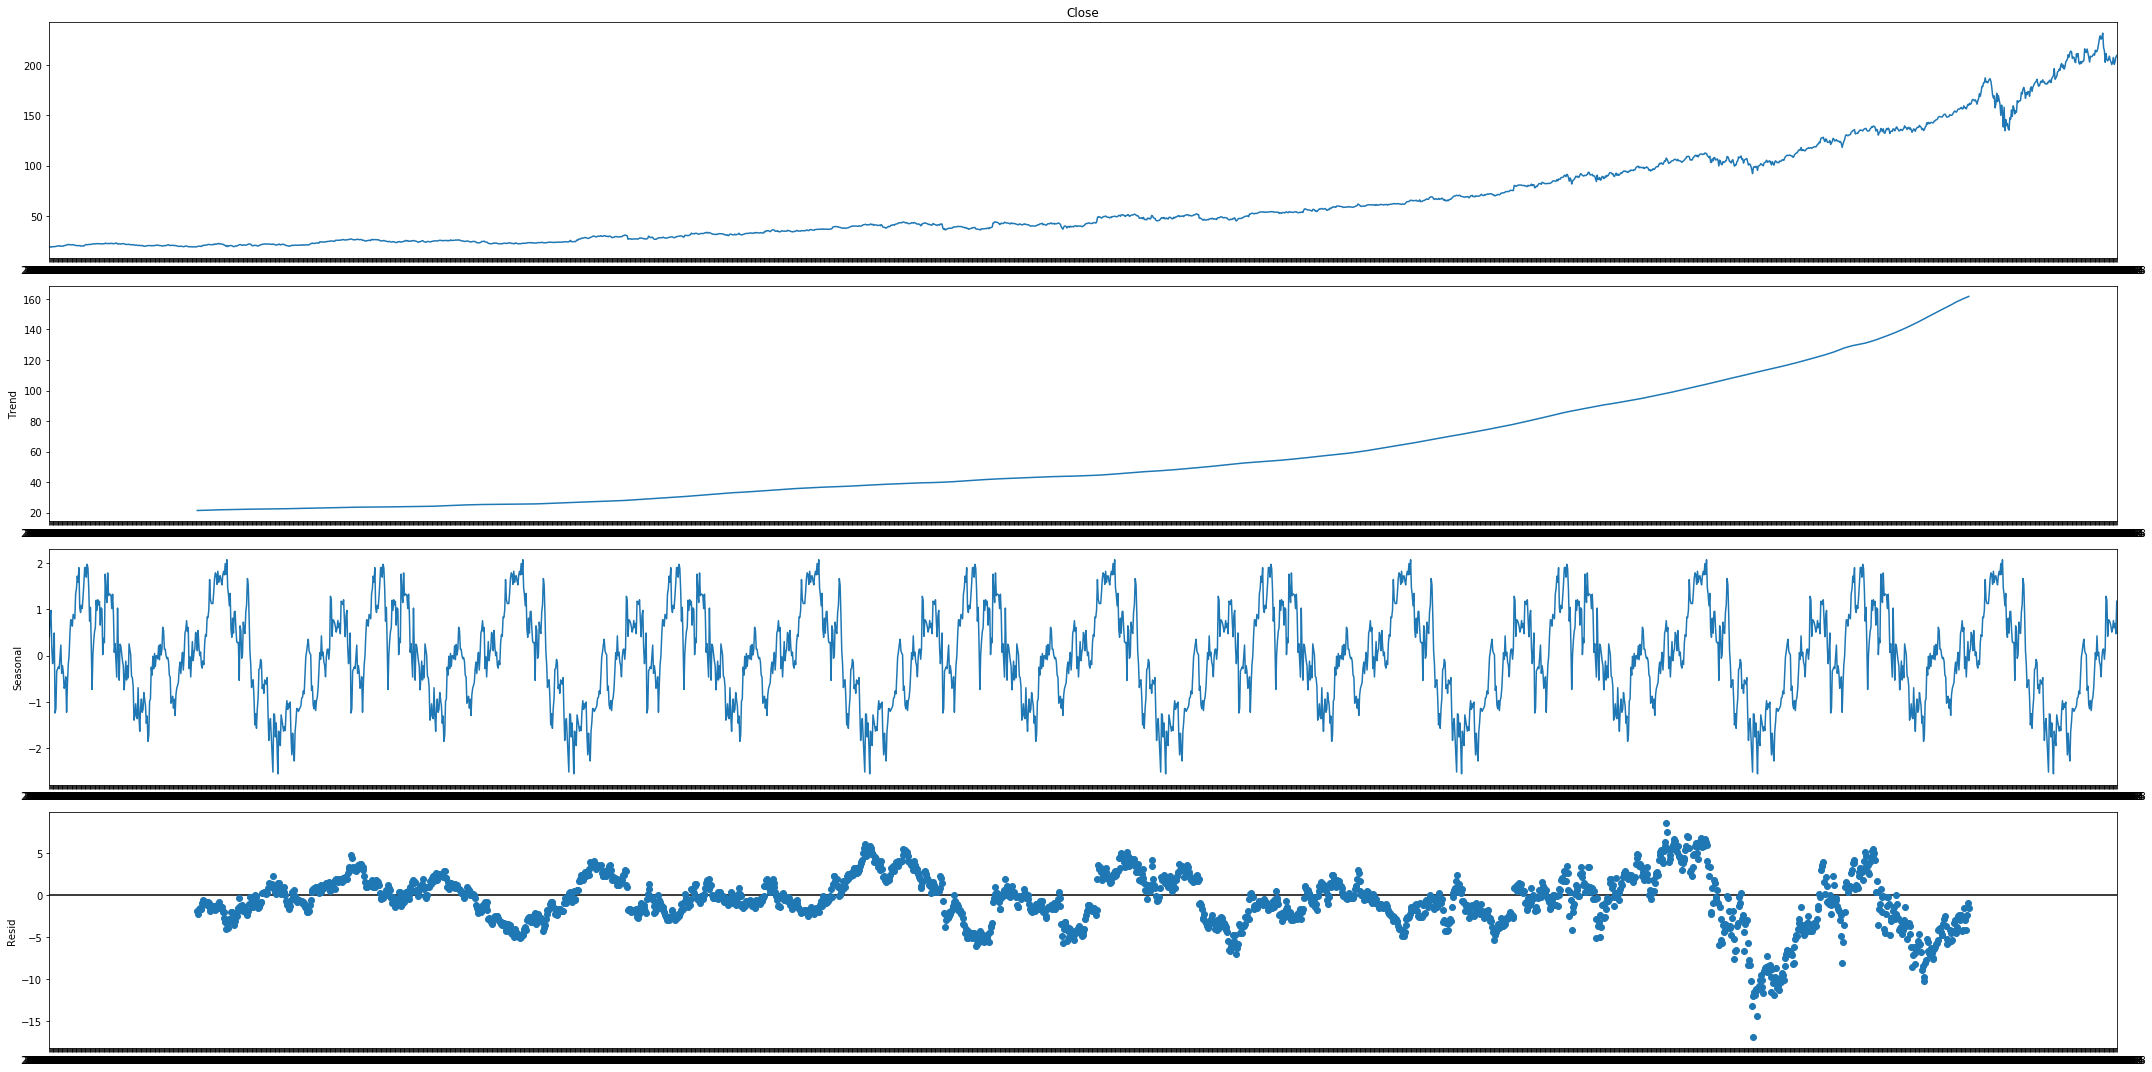

In [21]:
tend_seaso(msft)

On peut observer que la tendance à la hausse. On peut aussi noter une saisonalité, il y a des mouvements cycliques à intervalles réguliers qui se répètent . On note beaucoup de résidus.

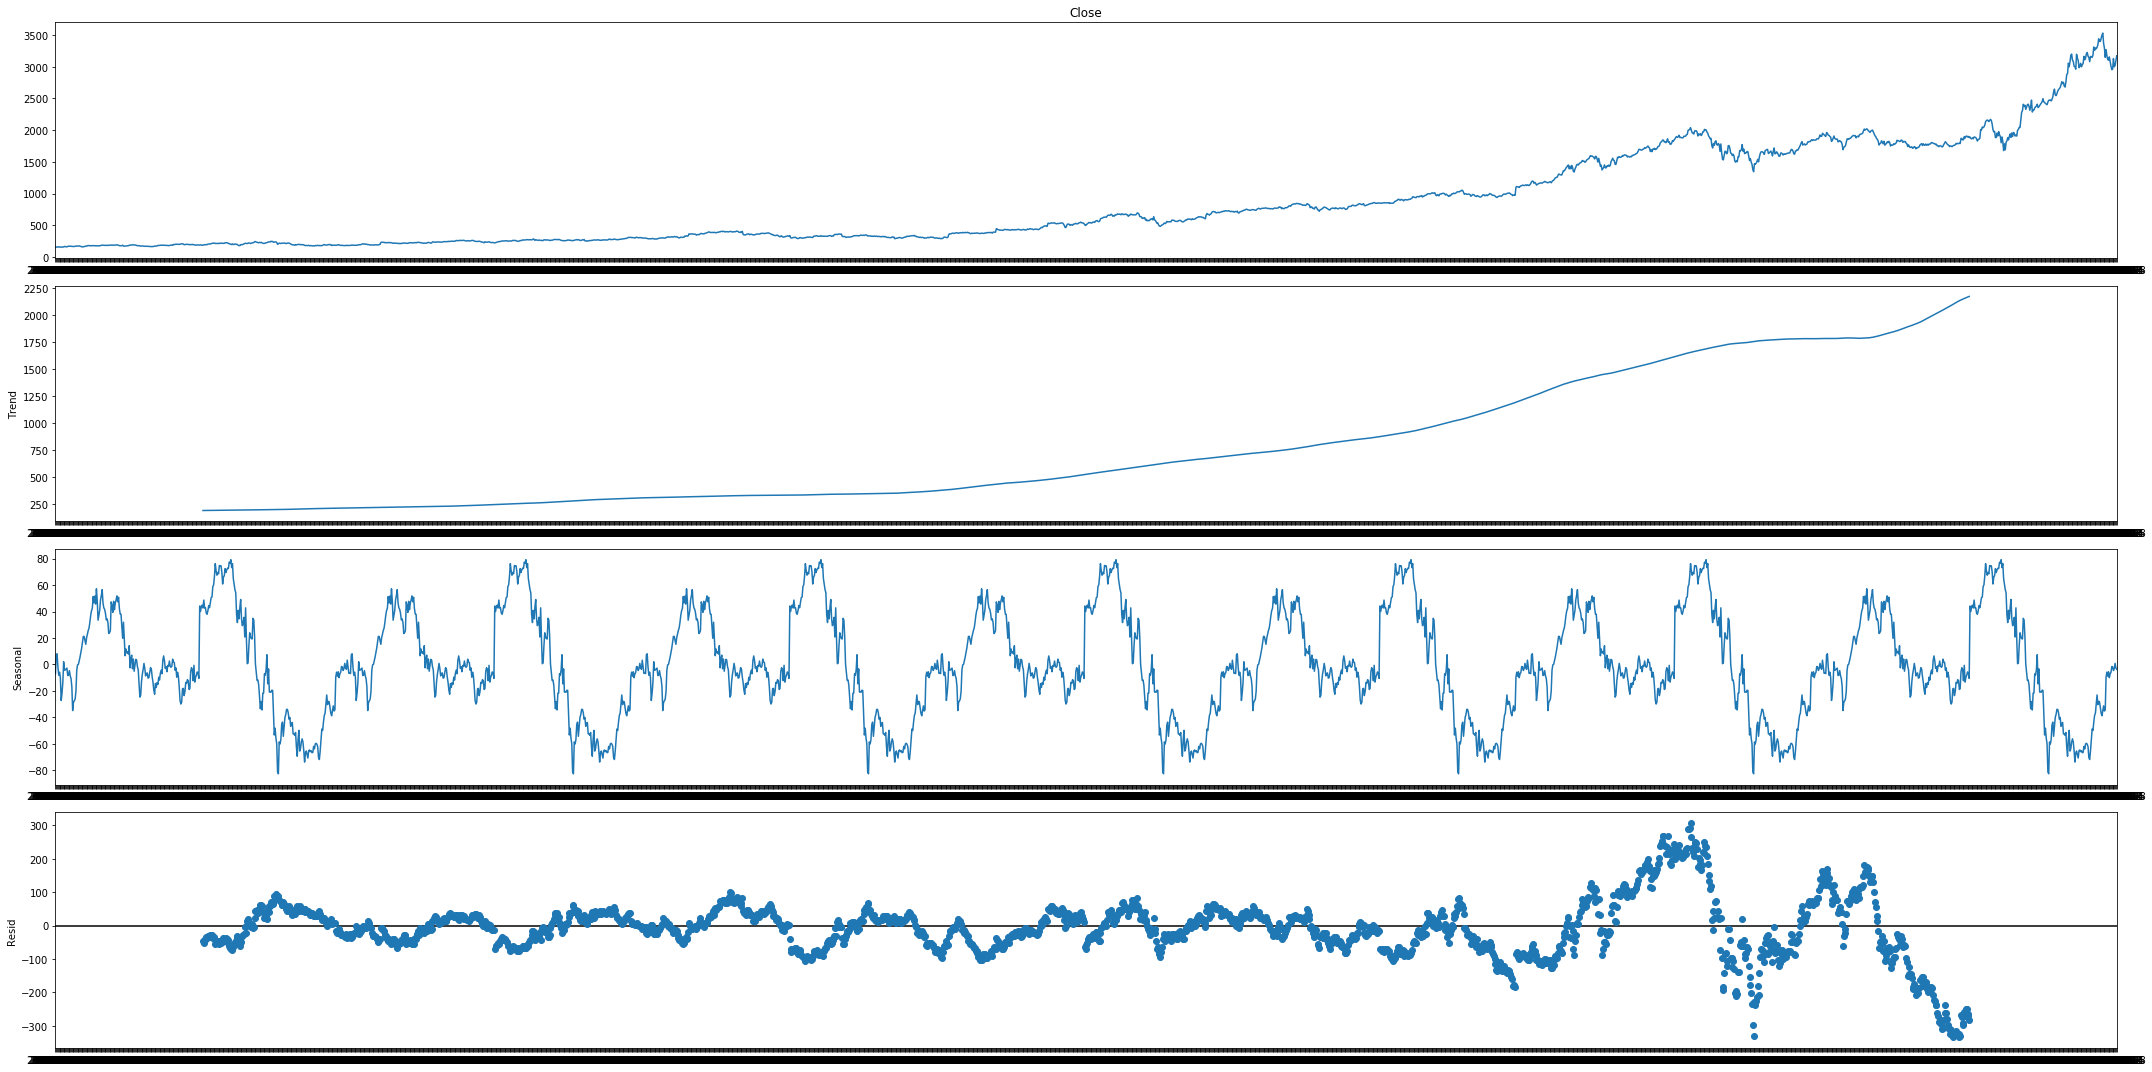

In [22]:
tend_seaso(amzn)

On peut observer que la tendance à la hausse. On peut aussi noter une saisonalité, il y a des mouvements cycliques à intervalles réguliers qui se répètent . On note beaucoup de résidus.

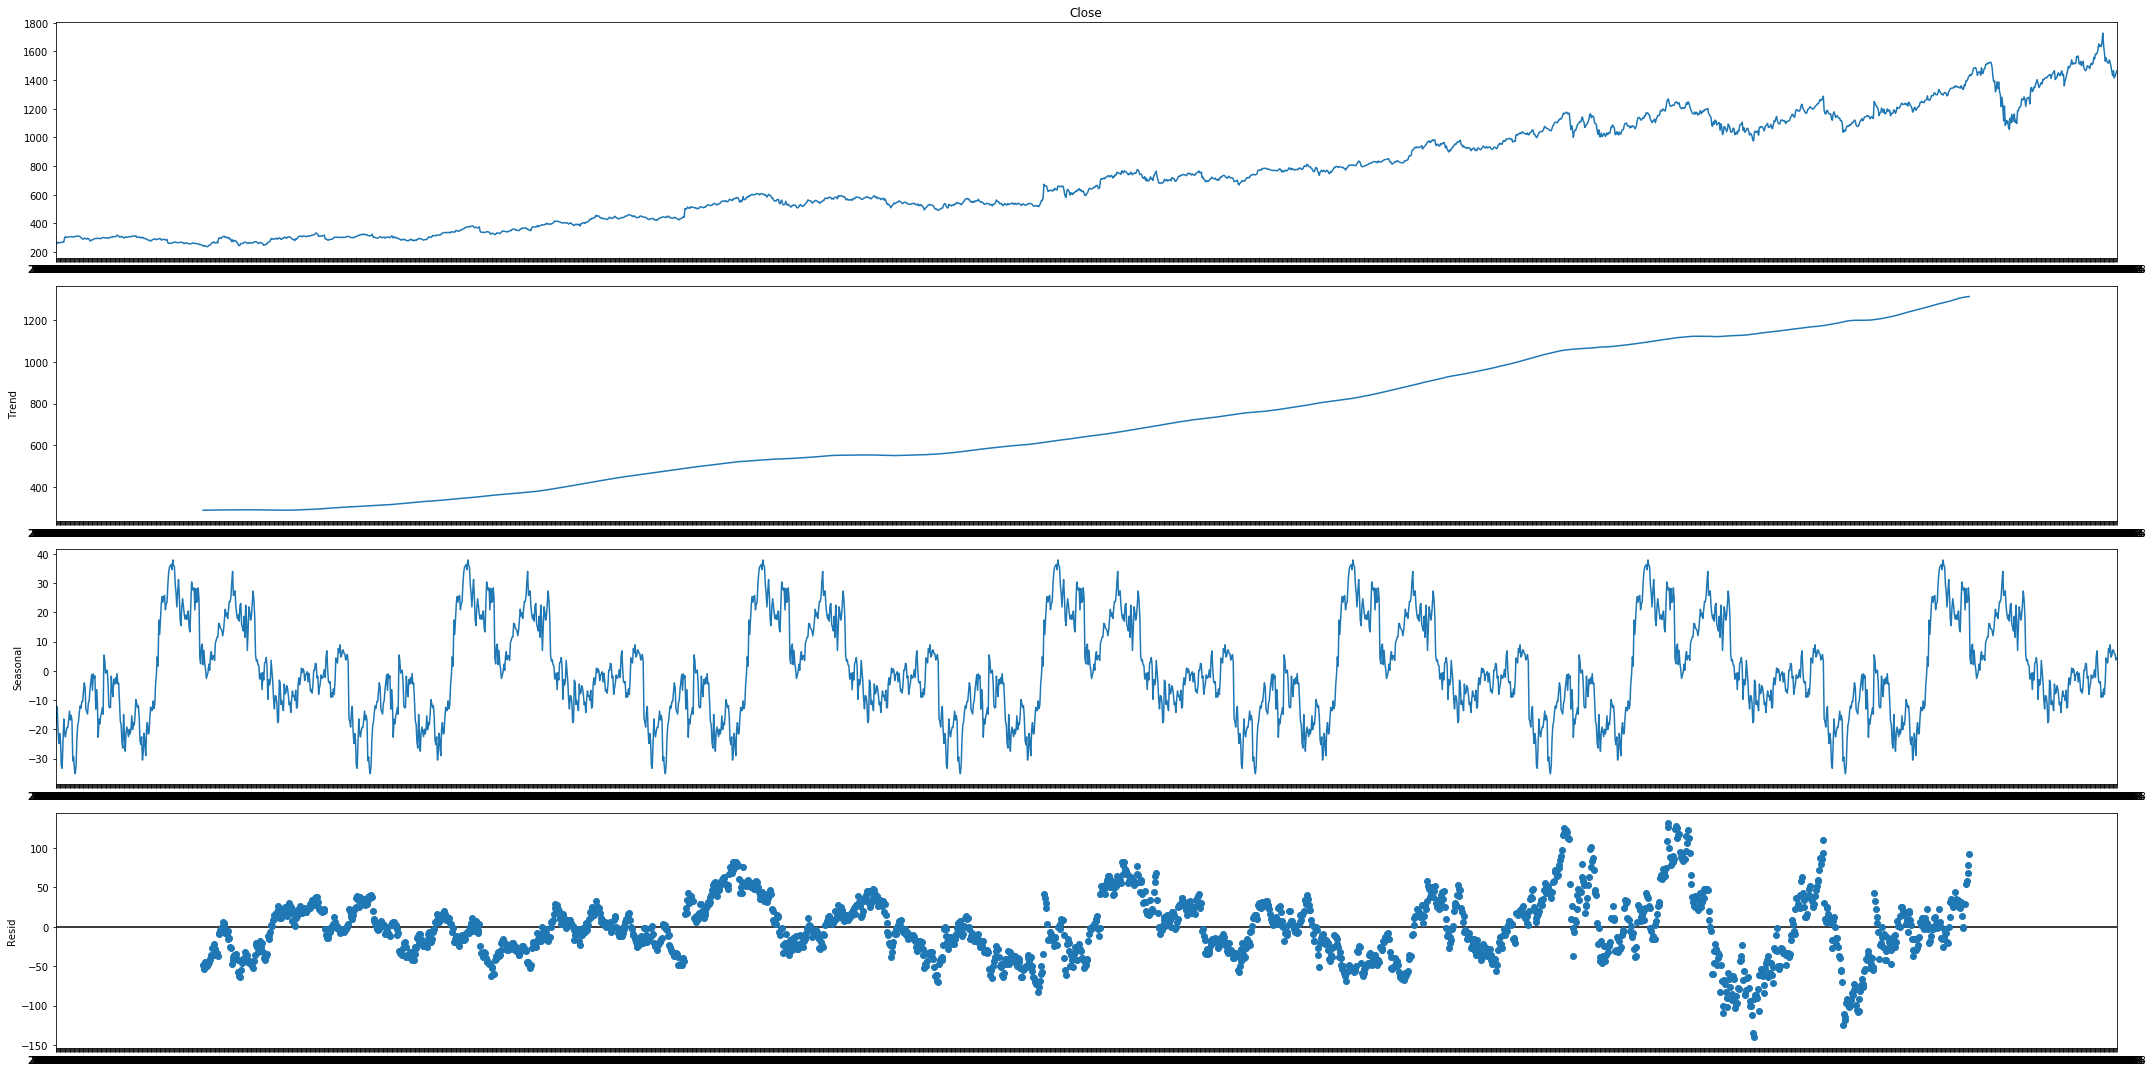

In [23]:
tend_seaso(goog)

In [60]:
msft= msft.reset_index('Date')
msft.head()

,Date,Open,High,Low,Close,Volume,companies,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return
0,2010-09-30,19.50,19.67,19.30,19.40,61262700,MSFT,19.485,MICROSOFT,NaN,NaN,NaN,NaN
1,2010-10-01,19.62,19.66,19.25,19.32,62672300,MSFT,19.455,MICROSOFT,NaN,NaN,NaN,-0.004124
2,2010-10-04,18.98,19.01,18.84,18.94,98143400,MSFT,18.925,MICROSOFT,NaN,NaN,NaN,-0.019669
3,2010-10-05,19.06,19.37,18.94,19.29,78152900,MSFT,19.155,MICROSOFT,NaN,NaN,NaN,0.018479
4,2010-10-06,19.27,19.44,19.12,19.36,50489700,MSFT,19.280,MICROSOFT,NaN,NaN,NaN,0.003629


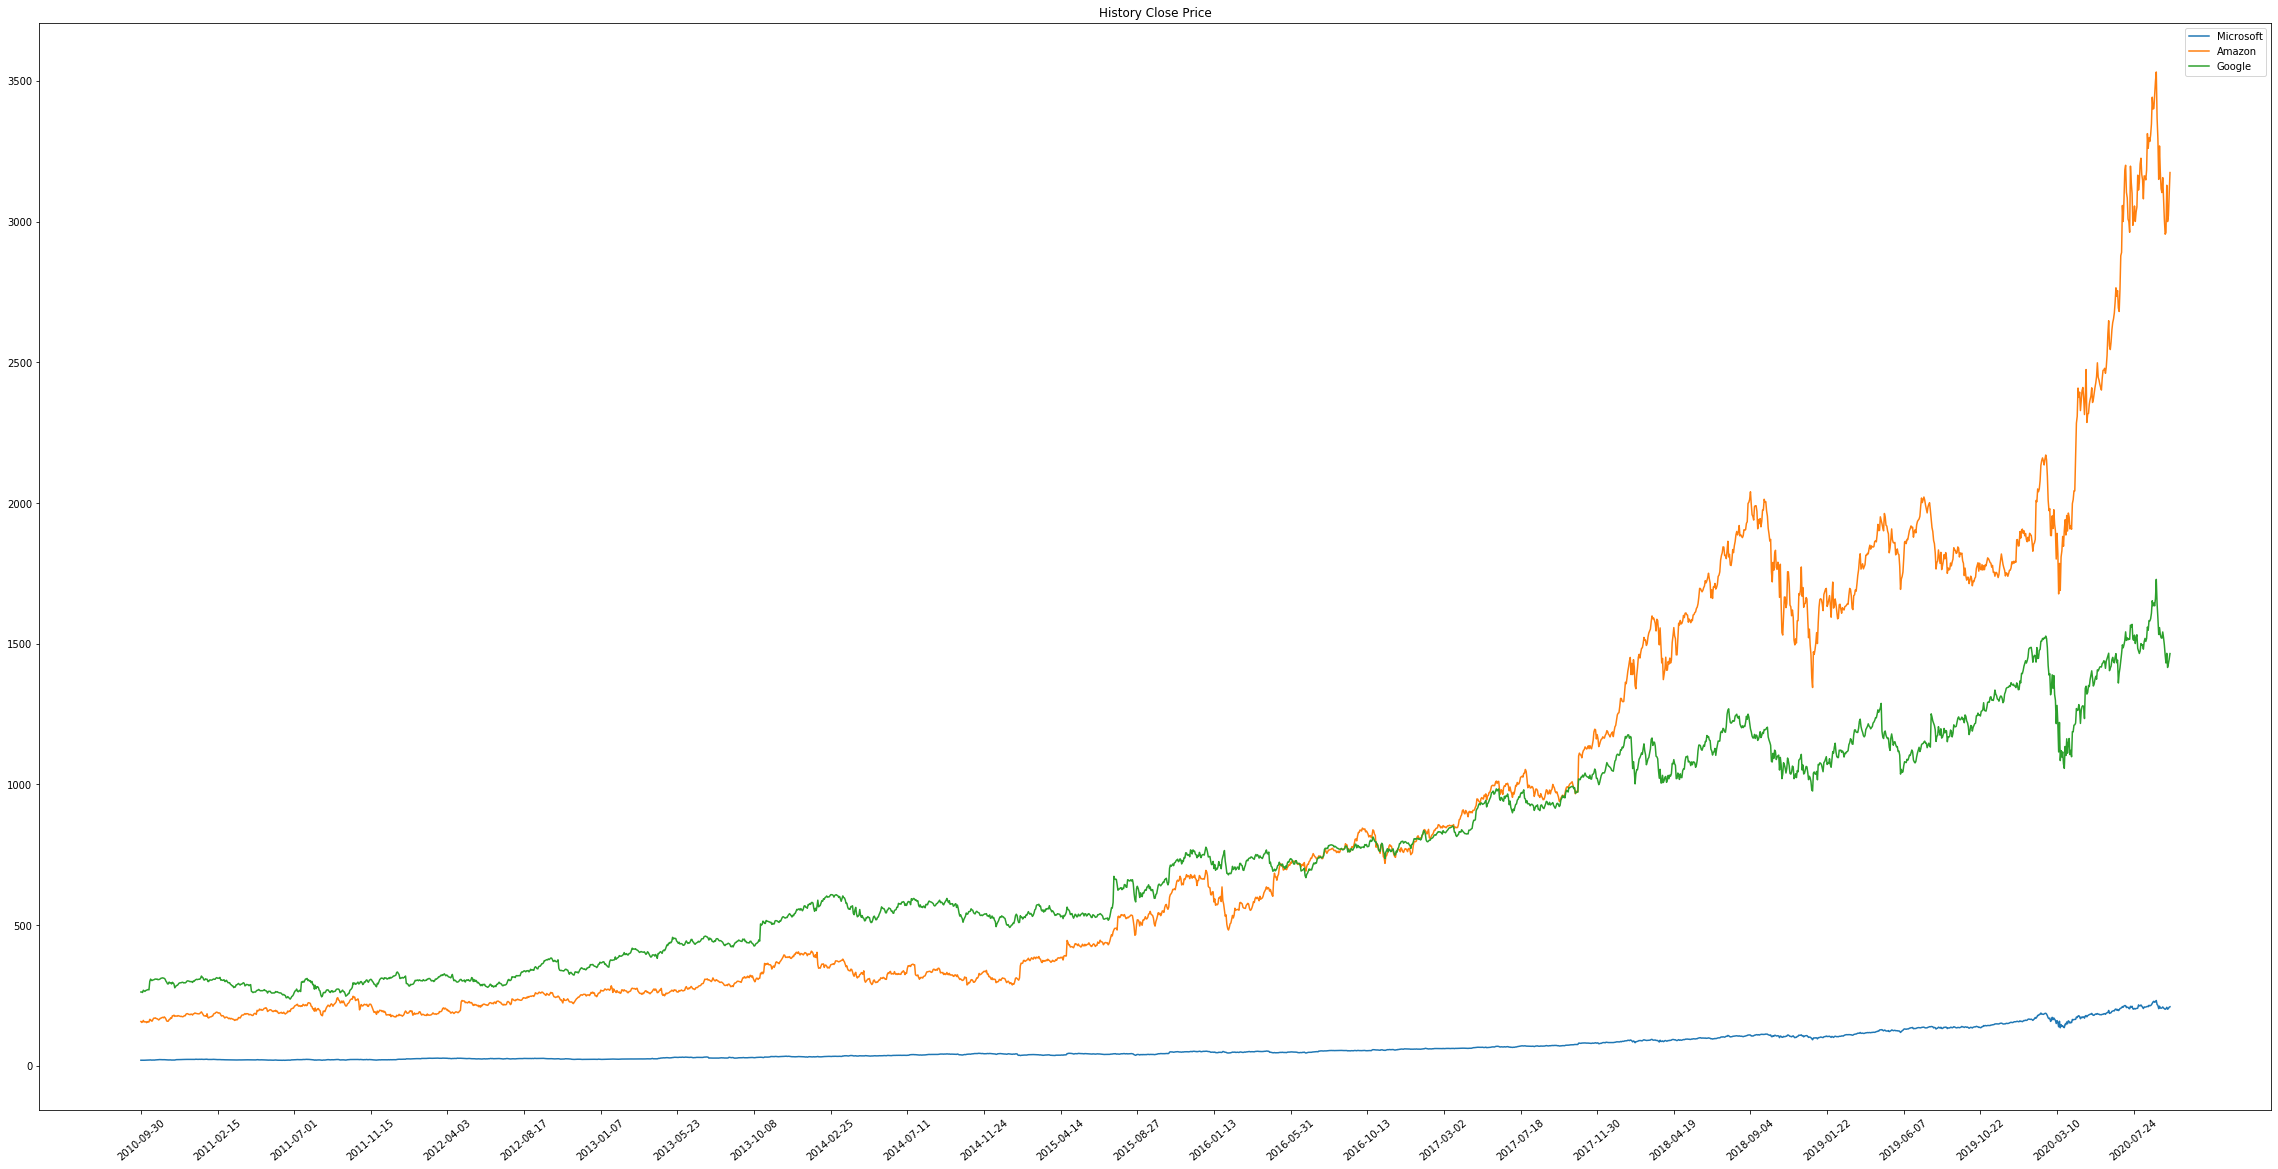

In [25]:
# Superpossons les courbes du prix moyen des actions da chaque entreprise
plt.figure(figsize = (40, 20))
plt.plot(msft.index, msft['Close'], label = 'Microsoft')
plt.xticks(range(0,msft.shape[0],95),msft['Date'].loc[::95],rotation=40)
plt.plot( amzn['Close'], label = 'Amazon')
plt.plot(goog['Close'], label = 'Google')
plt.title("History Close Price")
plt.legend(loc='best')
plt.show()

On peut observer que la tendance à la hausse. On peut aussi noter une saisonalité, il y a des mouvements cycliques à intervalles réguliers qui se répètent . On note beaucoup de résidus.

On peut remarquer que le prix de Microsoft évolue lentement contrairement au deux autres entreprises. Google était au dessus d'Amazon qui à prit le dessus. On voit bien que le prix est plus élevé mais instable contrairement à Microsoft qui certe évolue moins vite mais du coup chute moins vite.

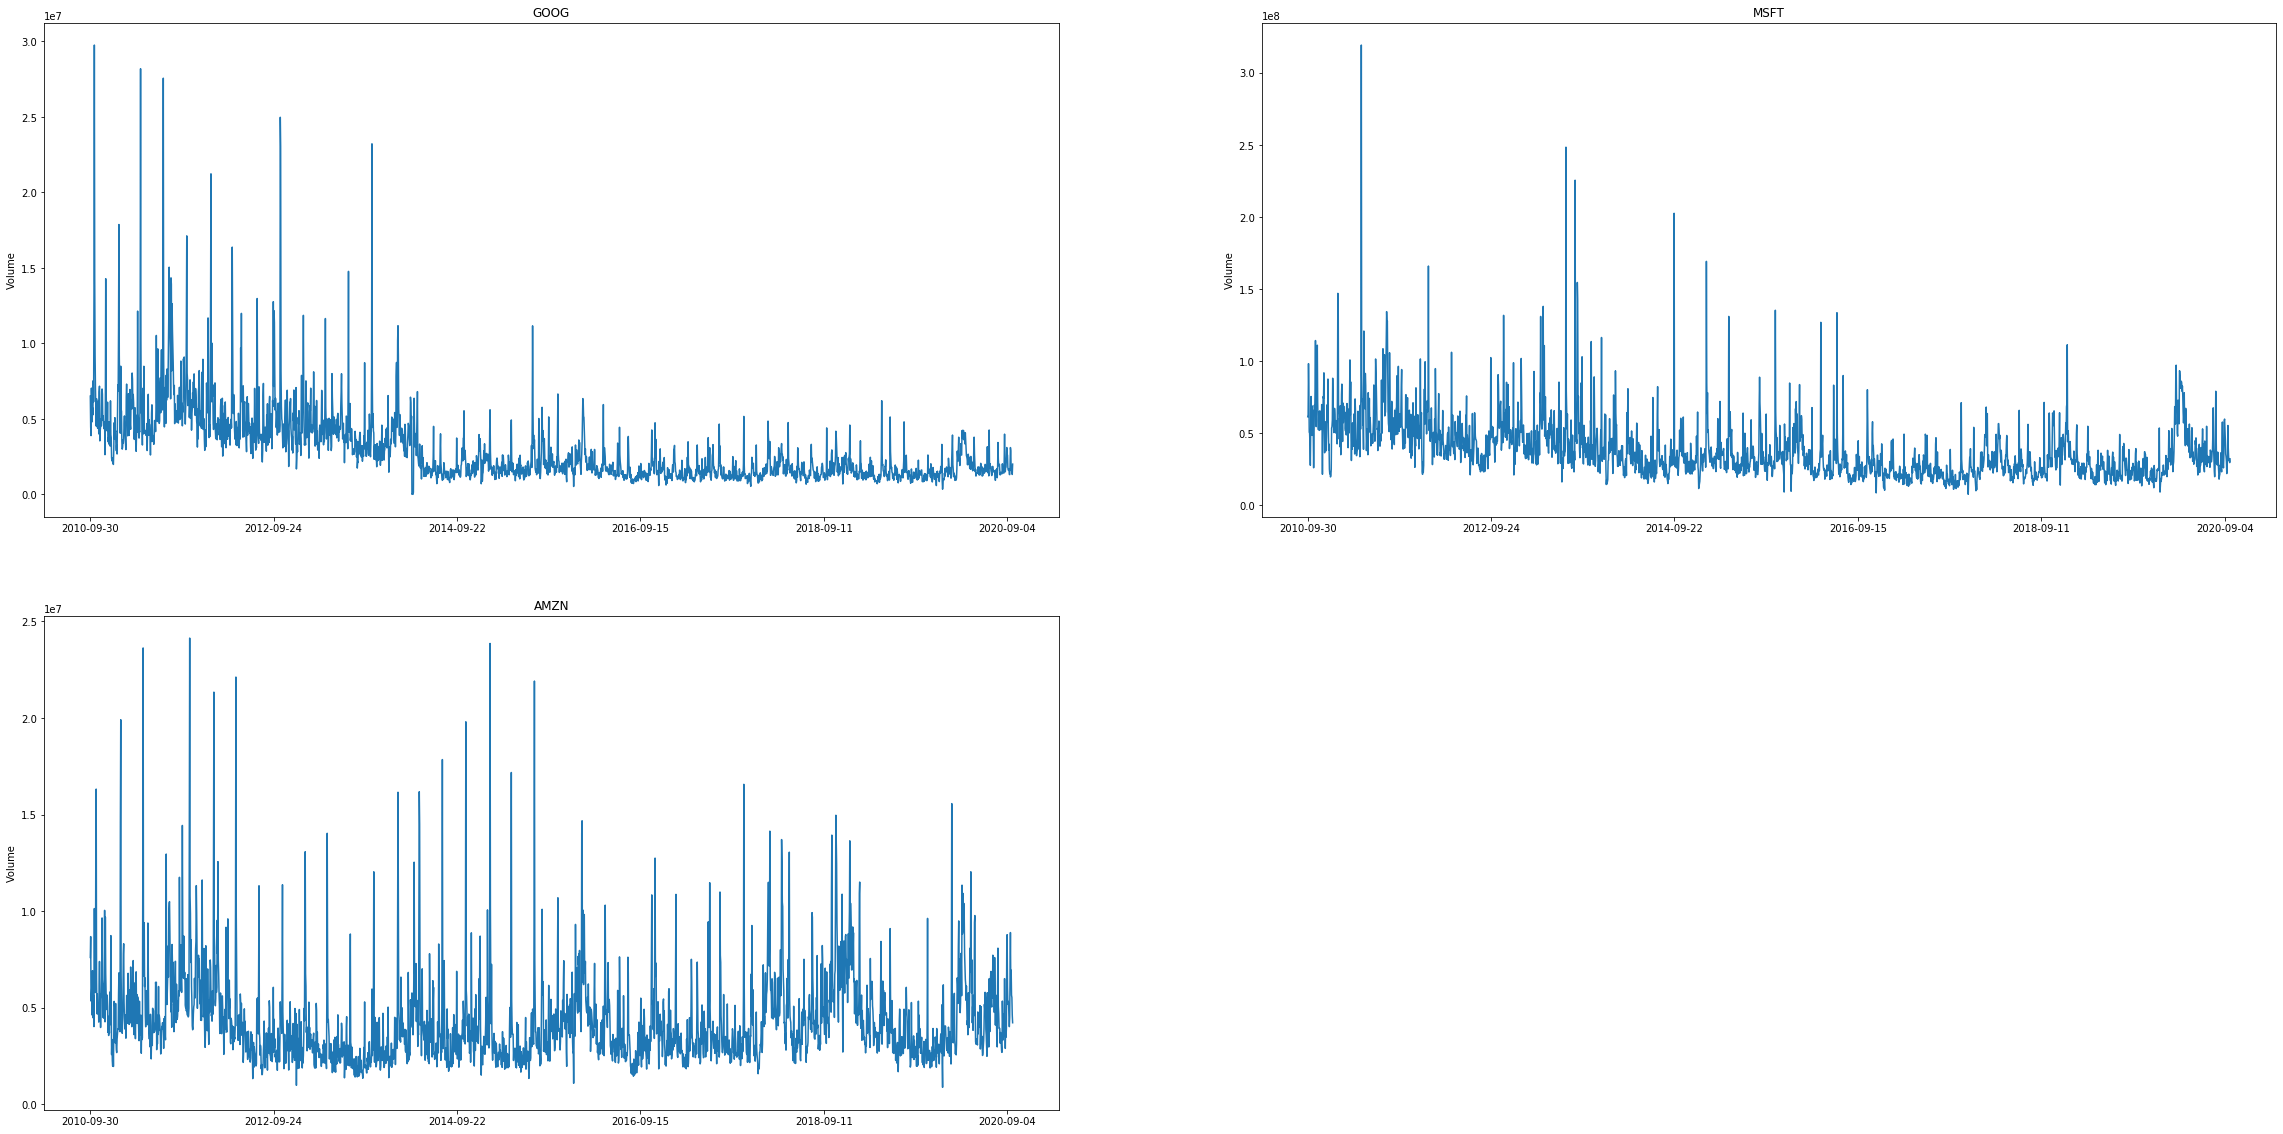

In [26]:
# Maintenant, traçons le volume total des actions échangées chaque jour
plt.figure(figsize=(40, 20))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

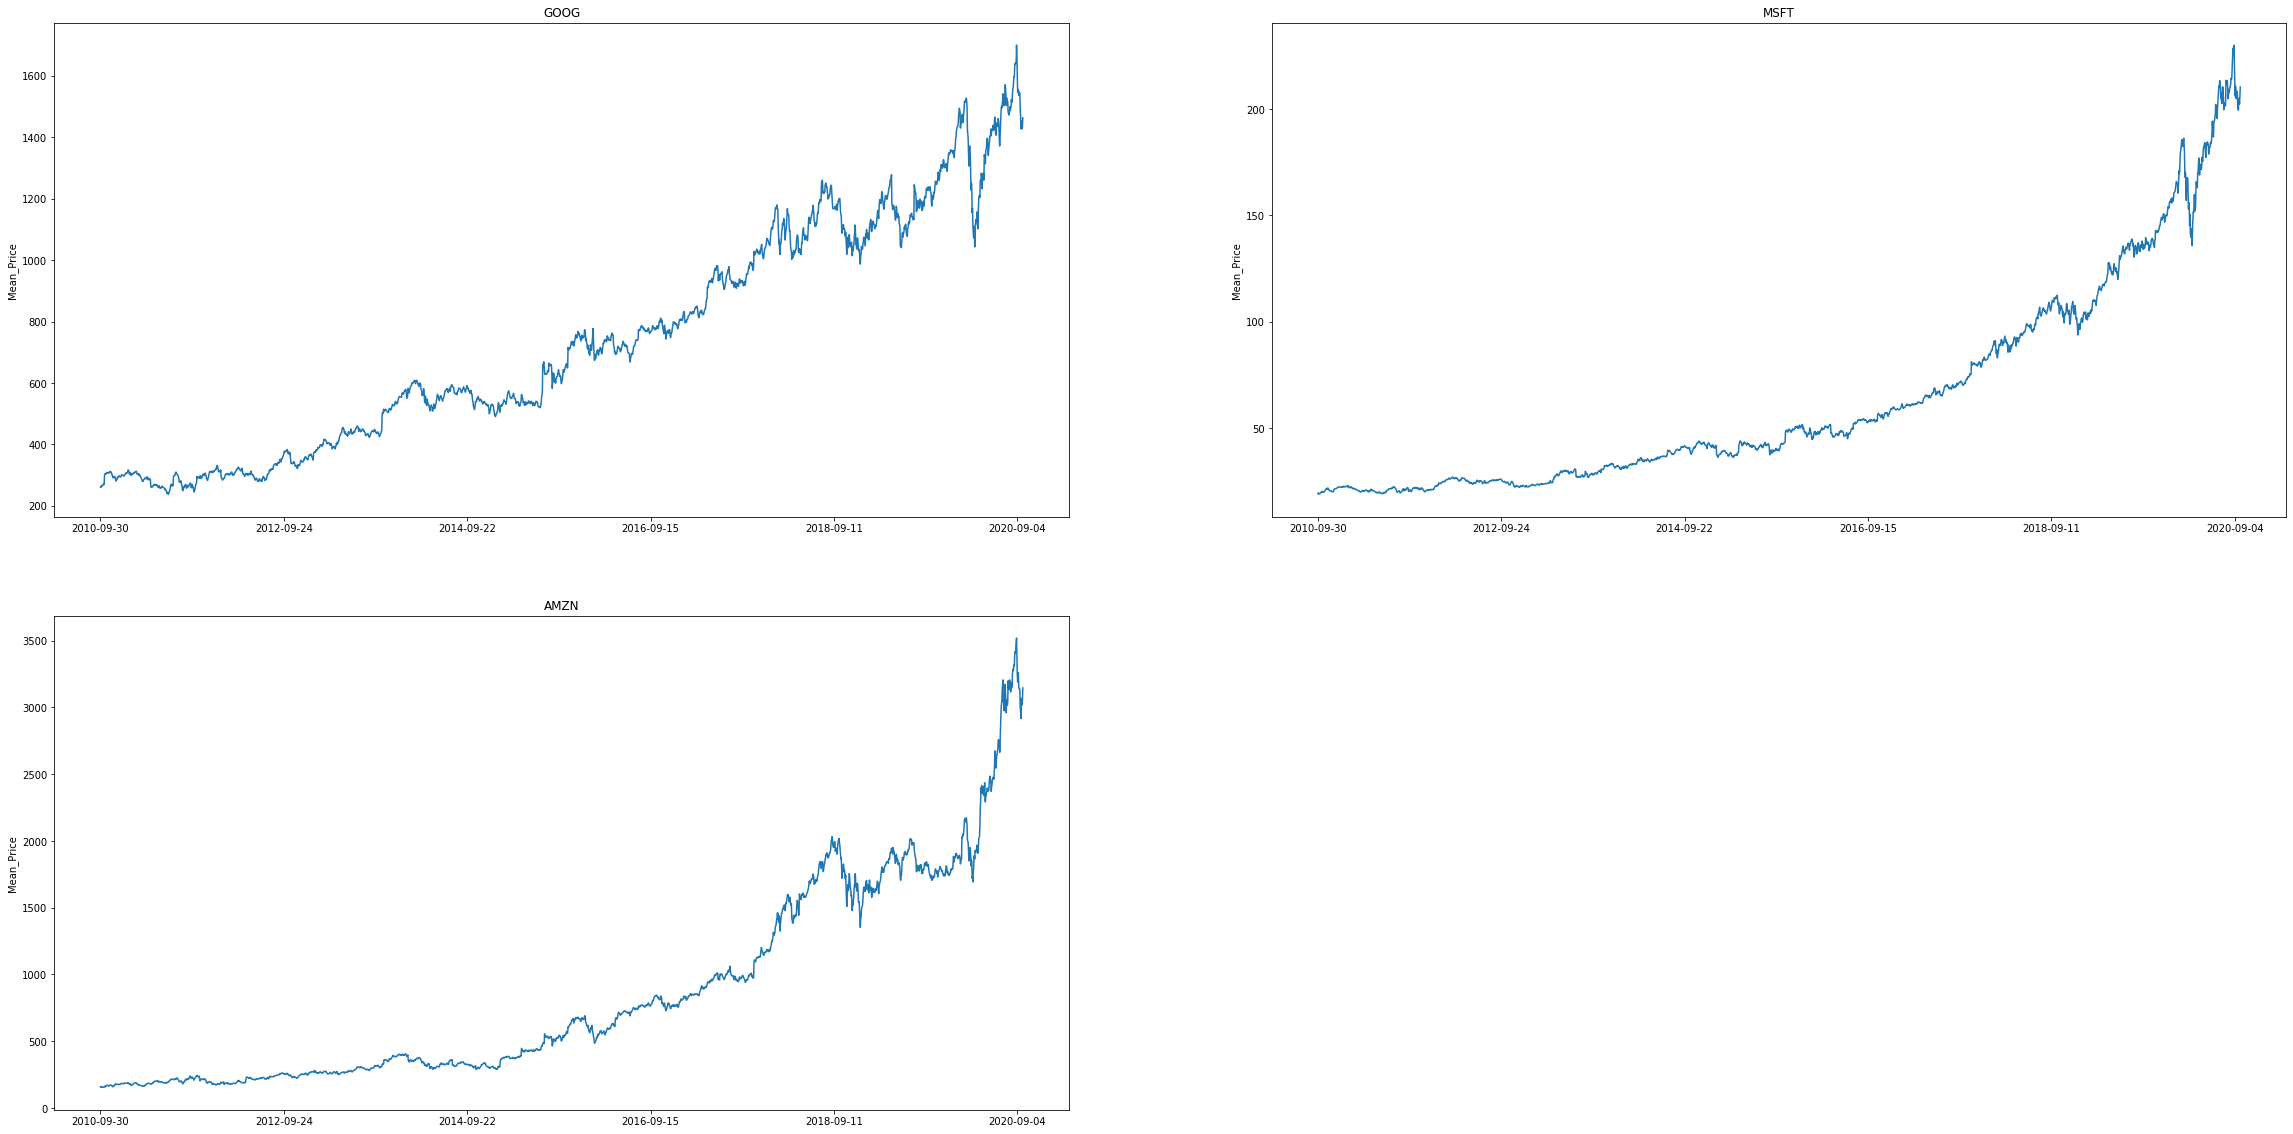

In [27]:
# Maintenant, traçons le prix moyen des actions 

plt.figure(figsize=(40, 20))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Mean_Price'].plot()
    plt.ylabel('Mean_Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

### Quelle est la moyenne mobile des différentes actions?


In [28]:
msft= msft.set_index('Date')

In [29]:

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA sur {ma} jours"
        company[column_name] = company['Close'].rolling(ma).mean()

In [30]:
print(goog.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'companies', 'Mean_Price',
       'company_name', 'MA sur 10 jours', 'MA sur 20 jours',
       'MA sur 50 jours'],
      dtype='object')


company_name
AMAZON       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GOOGLE       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
MICROSOFT    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

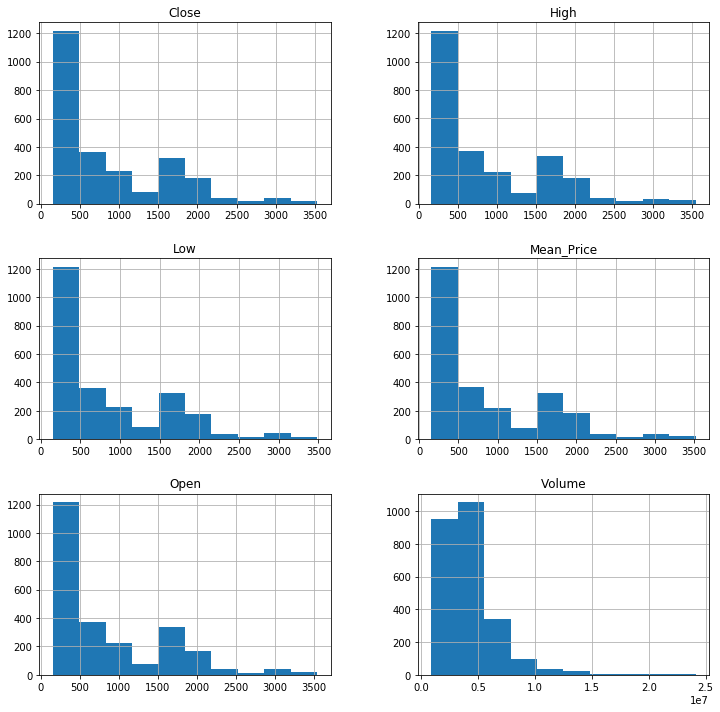

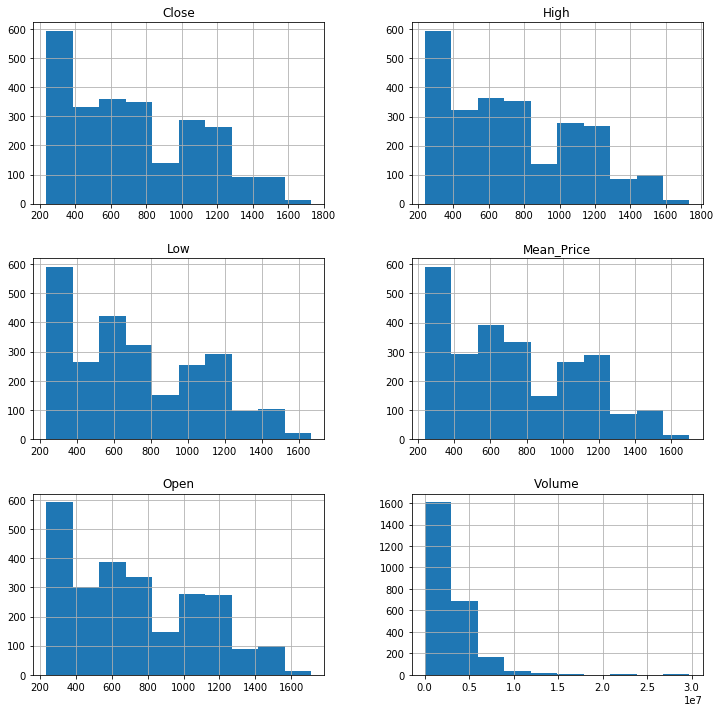

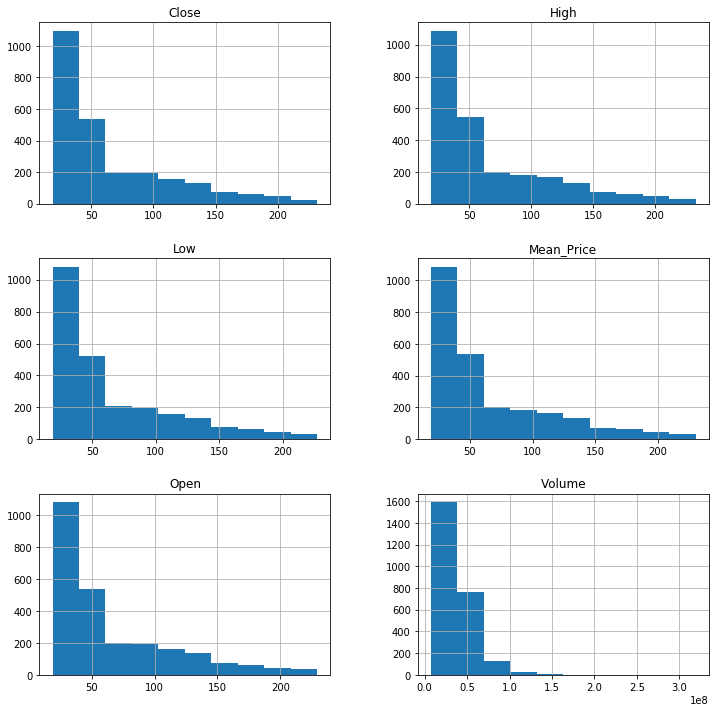

In [31]:
# Maintenant,nous allons tracer toutes les moyennes mobiles supplémentaires
df.groupby("company_name").hist(figsize=(12, 12))

In [59]:
# On va concaténer les dataframes
tech_list = ['GOOG', 'MSFT', 'AMZN']
company_list = [goog, msft, amzn]
company_name = ["GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

,Open,High,Low,Close,Volume,companies,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return
Date,,,,,,,,,,,,
2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,AMZN,3067.095,AMAZON,3095.024,3241.7185,3176.3698,0.056923
2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,AMZN,3059.690,AMAZON,3068.149,3224.3870,3174.6870,-0.041269
2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,AMZN,3017.150,AMAZON,3052.617,3203.2840,3174.9054,0.006644
2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,AMZN,3050.270,AMAZON,3050.508,3188.0405,3176.8100,0.024949
2020-09-28,3148.85,3175.04,3117.17,3174.05,4224200,AMZN,3146.105,AMAZON,3057.616,3176.6530,3181.0516,0.025498


In [42]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA sur {ma} jours"
        company[column_name] = company['Close'].rolling(ma).mean()

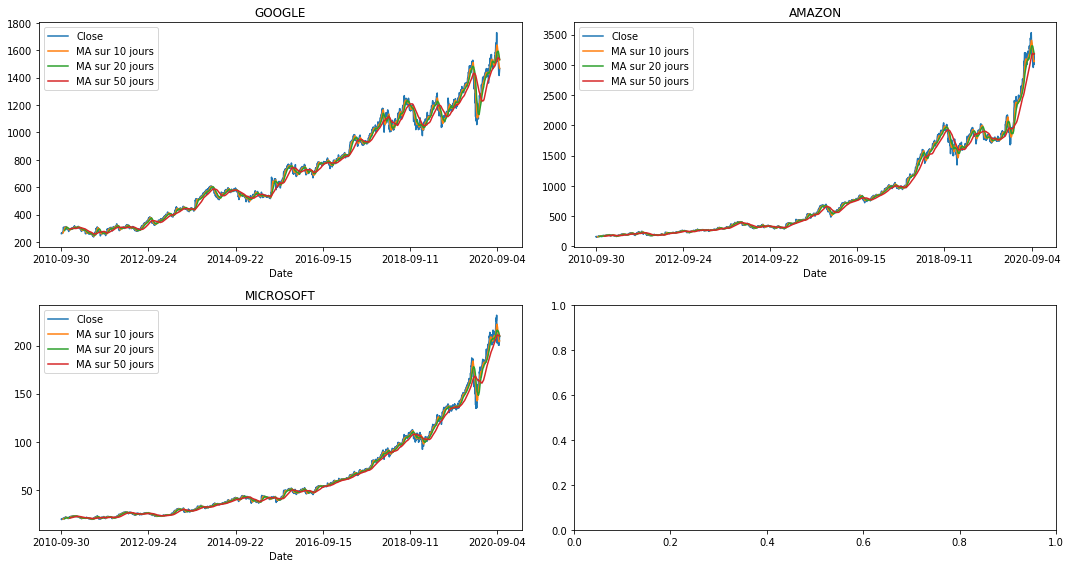

In [43]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

goog[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[0,0])
axes[0,0].set_title('GOOGLE')

msft[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

amzn[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

fig.tight_layout()

### Quel a été le rendement quotidien du stock en moyenne?

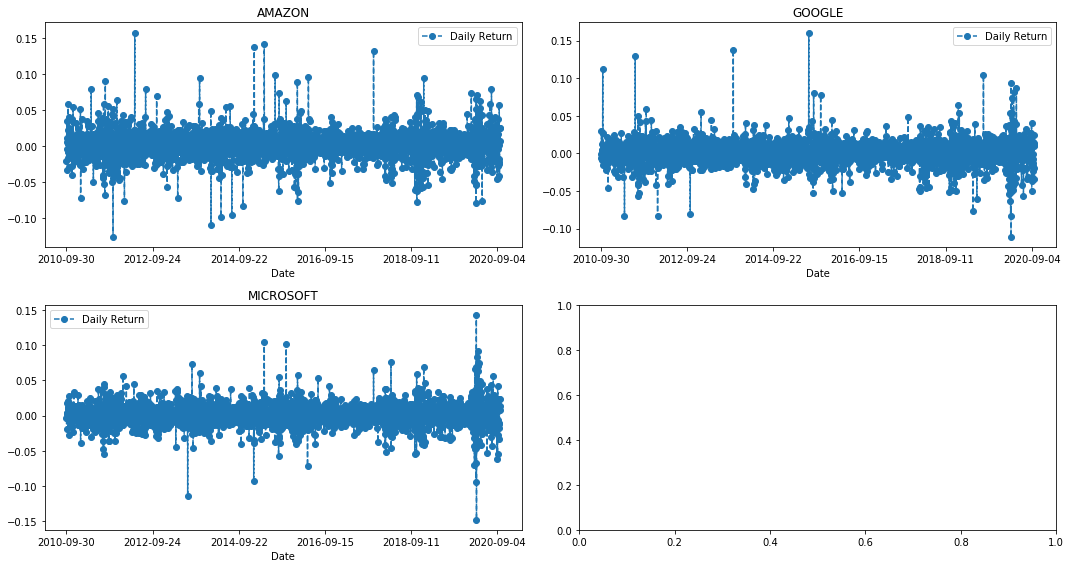

In [44]:
# Nous utiliserons pct_change pour trouver le pourcentage de changement pour chaque jour
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Ensuite, nous tracerons le pourcentage de retour quotidien
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


goog['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

msft['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

amzn['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

fig.tight_layout()

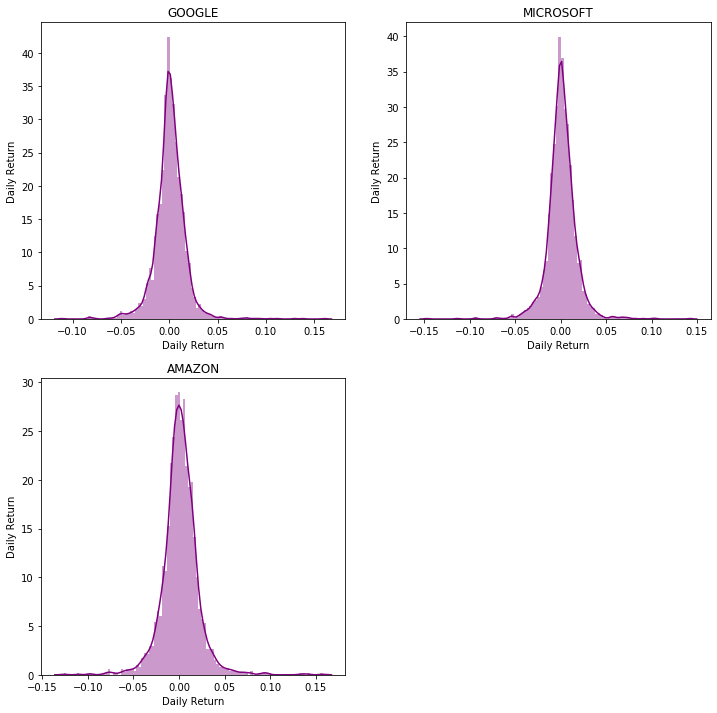

In [45]:
'''  Examinons maintenant le rendement quotidien moyen à l'aide d'un histogramme. 
Nous utiliserons seaborn pour créer à la fois un histogramme et un tracé kde sur la même figure'''
# Notez l'utilisation de dropna() ici, sinon les valeurs NaN ne peuvent pas être lues par seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

### Quelle était la corrélation entre les différents cours de clôture des actions?

In [46]:
# Pour analyser les rendements de toutes les actions de notre liste nous devons construir un DataFrame avec toutes les colonnes ['Close'] pour chacun des dataframes des stocks.
concat= amzn.merge(goog, how = 'inner', on = 'Date', left_index = True)

In [47]:
concat = concat.merge(msft, how = 'inner', on = 'Date', left_index = True)

In [58]:
concat.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,companies_x,Mean_Price_x,company_name_x,MA sur 10 jours_x,MA sur 20 jours_x,...,Low,Close,Volume,companies,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-30,160.01,160.93,155.60,157.06,7606000,AMZN,158.265,AMAZON,NaN,NaN,...,19.30,19.40,61262700,MSFT,19.485,MICROSOFT,NaN,NaN,NaN,NaN
2010-10-01,157.08,157.44,152.20,153.71,8683400,AMZN,154.820,AMAZON,NaN,NaN,...,19.25,19.32,62672300,MSFT,19.455,MICROSOFT,NaN,NaN,NaN,-0.004124
2010-10-04,153.95,155.96,152.79,155.39,5346500,AMZN,154.375,AMAZON,NaN,NaN,...,18.84,18.94,98143400,MSFT,18.925,MICROSOFT,NaN,NaN,NaN,-0.019669
2010-10-05,157.08,161.21,157.01,160.87,5620000,AMZN,159.110,AMAZON,NaN,NaN,...,18.94,19.29,78152900,MSFT,19.155,MICROSOFT,NaN,NaN,NaN,0.018479
2010-10-06,160.60,160.68,154.60,155.40,6060800,AMZN,157.640,AMAZON,NaN,NaN,...,19.12,19.36,50489700,MSFT,19.280,MICROSOFT,NaN,NaN,NaN,0.003629


In [57]:
mean_price = concat[['Mean_Price_x', 'Mean_Price_y', 'Mean_Price']]
mean_price.head()

,Mean_Price_x,Mean_Price_y,Mean_Price
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280


In [50]:
mean_price.rename(columns={'Mean_Price_x': 'Mean_Price Amazon', 'Mean_Price_y': 'Mean_Price Google', 'Mean_Price': 'Mean_Price Microsoft'}, inplace=True)

C:\Users\utilisateur\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
mean_price.head()

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280


In [55]:
# Nouveau DataFrame avec le pourcentage de changement pour chaque jour
tech_rets = mean_price.pct_change()
tech_rets.head()

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,NaN,NaN,NaN
2010-10-01,-0.021767,0.002694,-0.001540
2010-10-04,-0.002874,-0.006173,-0.027242
2010-10-05,0.030672,0.018558,0.012153
2010-10-06,-0.009239,0.003143,0.006526


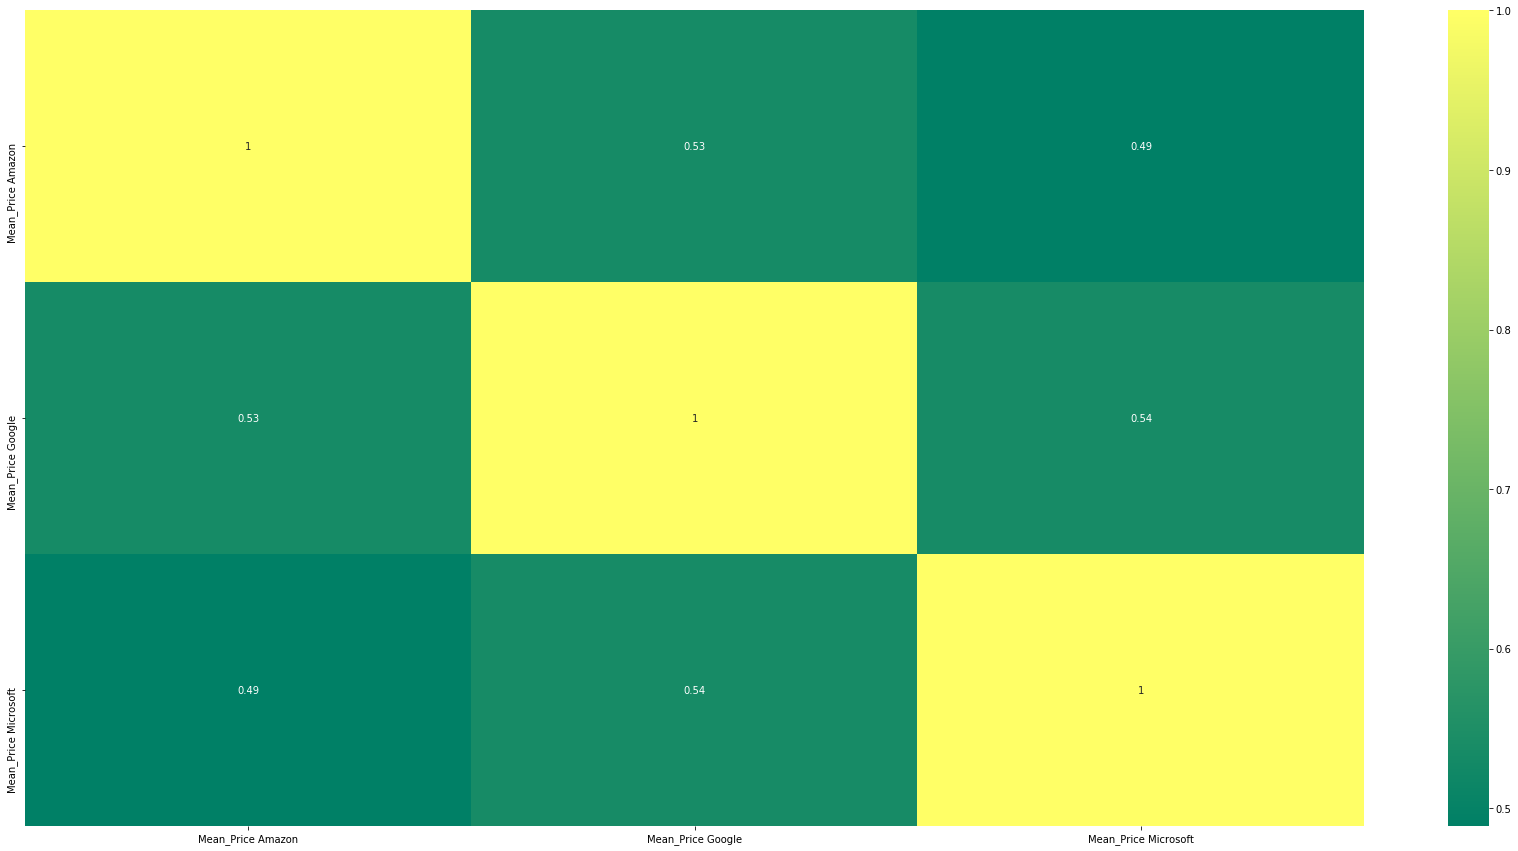

In [53]:
# Matrice de corrélation  pour les rendements quotidiens
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

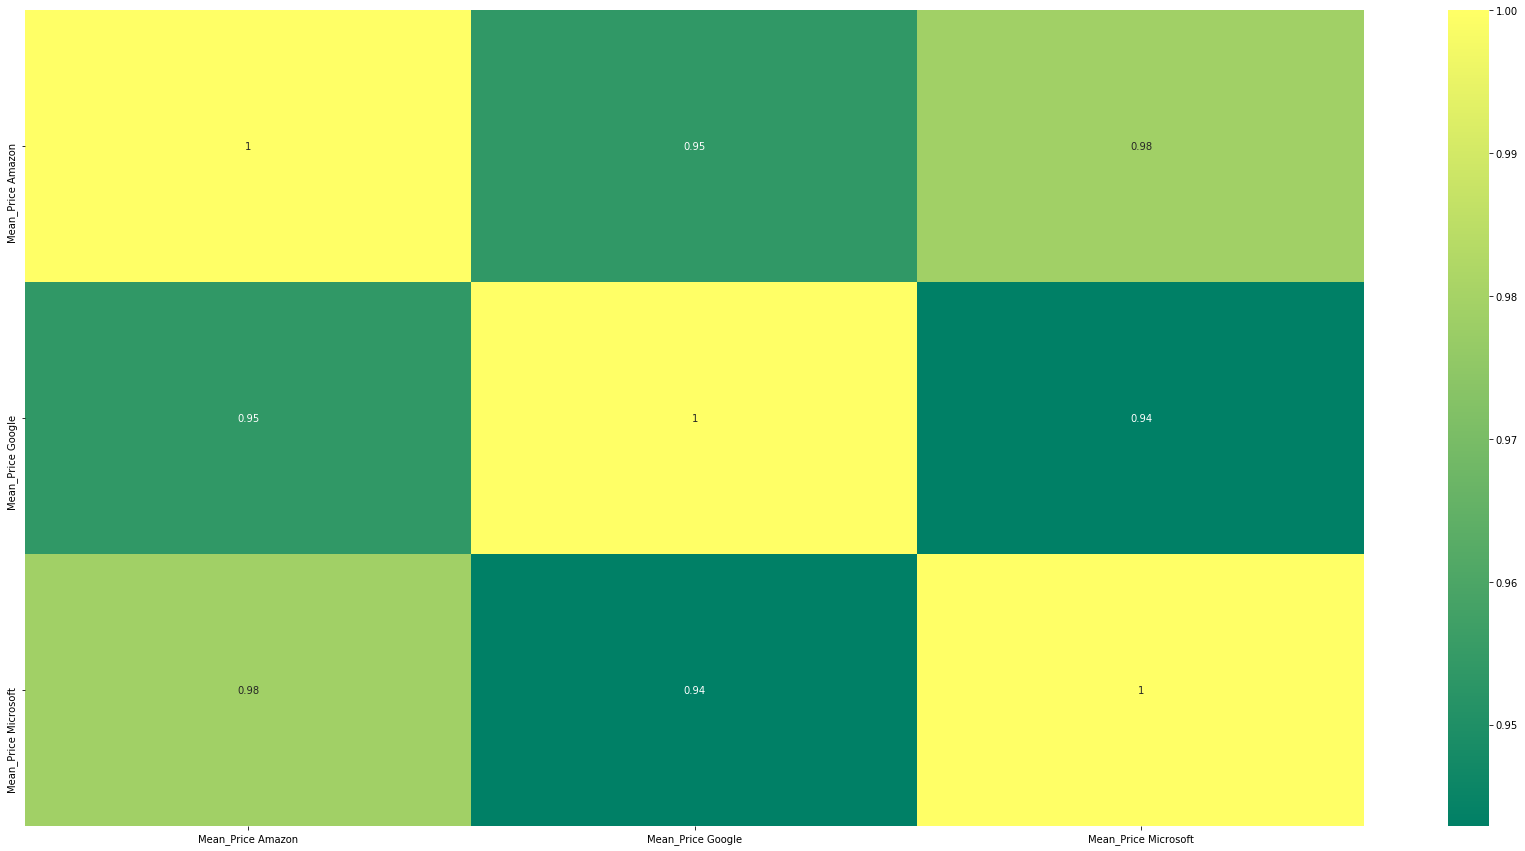

In [54]:
# Matrice de corrélation  pour les prix moyens
sns.heatmap(mean_price.corr(), annot=True, cmap='summer')

Les corrélation sont fortement positives entre les 3 entreprises. Las courbes des prix moyens le montre bien. On peut observé des pics de hausse ou de baisse simultané  pour Amazon et Google aux même périodes. C'est moins visible pour Microsoft. 